# Mounting Google Drive

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


##Loading dataset from drive

In [0]:
from zipfile import ZipFile
file_name = "/content/drive/My Drive/DATASETS/dogs-vs-cats.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
from zipfile import ZipFile
file_name = "/content/train.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
from zipfile import ZipFile
file_name = "/content/test1.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


## Creating Dataframe

In [0]:
import os
import pandas as pd
filenames = os.listdir("/content/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'cat':
        categories.append('0')
    else:
        categories.append('1')

df1= pd.DataFrame({
    'filename': filenames,
    'category': categories
})
df1.head()

,filename,category
0,cat.8699.jpg,0
1,dog.4444.jpg,1
2,cat.5483.jpg,0
3,dog.3970.jpg,1
4,cat.582.jpg,0


### Checking info

In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
filename    25000 non-null object
category    25000 non-null object
dtypes: object(2)
memory usage: 390.7+ KB


## Shuffling the data

In [0]:
from sklearn.utils import shuffle
df3 = shuffle(df1, random_state=0)
df3

,filename,category
14149,dog.7382.jpg,1
8946,dog.11080.jpg,1
22378,cat.12011.jpg,0
12162,cat.5649.jpg,0
4879,cat.8693.jpg,0
12710,dog.5241.jpg,1
24595,dog.6621.jpg,1
308,dog.11613.jpg,1
4343,dog.475.jpg,1
18230,cat.6451.jpg,0


## Creating test dataframe

In [0]:
import os
import pandas as pd
filenames = os.listdir("/content/test1")

df_test= pd.DataFrame({
    'filename': filenames,
})
df_test.head()

,filename
0,295.jpg
1,2102.jpg
2,1154.jpg
3,9089.jpg
4,3685.jpg


In [0]:
X = pd.DataFrame(df3['filename'])
Y = pd.DataFrame(df3['category'])

##Splitting data 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

### Checking shape 

In [0]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(22500, 1) (2500, 1)
(22500, 1) (2500, 1)


### Concating the dataframe

In [0]:
X_data=pd.concat([X_train, Y_train], axis=1)
Y_data=pd.concat([X_test, Y_test], axis=1)

In [0]:
X_data

,filename,category
19668,cat.9488.jpg,0
20597,dog.943.jpg,1
10072,cat.11623.jpg,0
8748,cat.633.jpg,0
17178,cat.11830.jpg,0
11133,cat.2959.jpg,0
2180,cat.2919.jpg,0
11715,cat.75.jpg,0
22561,dog.9485.jpg,1
210,dog.11317.jpg,1


In [0]:
Y_data.head()

,filename,category
13490,cat.3860.jpg,0
7300,cat.10294.jpg,0
5186,cat.7637.jpg,0
3,dog.3970.jpg,1
9429,dog.759.jpg,1


In [0]:
X_train.head()

,filename
19668,cat.9488.jpg
20597,dog.943.jpg
10072,cat.11623.jpg
8748,cat.633.jpg
17178,cat.11830.jpg


## Pre-processing data with Image Data Generator

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data1 = ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True)

test_data1 = ImageDataGenerator(rescale=1./255)

train_generator = train_data1.flow_from_dataframe(
                    dataframe=X_data,
                    directory='/content/train',
                    x_col='filename',
                    y_col='category',
                    target_size=(256,256),
                    batch_size=100,
                    class_mode="binary")

test_generator = test_data1.flow_from_dataframe(
                    dataframe=Y_data,
                    directory='/content/train',
                    x_col='filename',
                    y_col='category',
                    target_size=(256,256),
                    batch_size=50,
                    class_mode="binary")

Found 22500 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


## Transfer Learning


##Using InceptionV3

In [0]:
from tensorflow.keras.applications import InceptionV3
trained2_model = InceptionV3(include_top=False, 
                           weights='imagenet',  
                           input_shape=(256,256,3))

W0723 13:46:05.532107 140490158081920 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


87916544/87910968 [==============================] - 3s 0us/step


In [0]:
trained2_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [0]:
from tensorflow.keras import Model,layers
from tensorflow.keras.layers import Flatten
last_layer = trained2_model.get_layer("mixed7")
output = last_layer.output
x = layers.Flatten()(trained2_model.layers[-1].output)
x = layers.GlobalAveragePooling2D()(output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
y = layers.Dense(1, activation='sigmoid')(x)

model = Model(trained2_model.input, y)

###Compling model

In [0]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import metrics


model.compile(loss='binary_crossentropy',
              optimizer=SGD(
                  lr=0.001, 
                  momentum=0.9,nesterov=True),
              metrics=['acc'])

W0723 13:51:21.154864 140490158081920 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Checking accuracy

In [0]:
history = model.fit_generator(
     train_generator,
     steps_per_epoch=225,  # 2000 images = batch_size * steps
     epochs=15,
     validation_data=test_generator,
     validation_steps=50,  # 1000 images = batch_size * steps
     verbose=2)

Epoch 1/15
225/225 - 559s - loss: 0.6749 - acc: 0.6064 - val_loss: 0.6143 - val_acc: 0.9096
Epoch 2/15
225/225 - 535s - loss: 0.5853 - acc: 0.8109 - val_loss: 0.3802 - val_acc: 0.9180
Epoch 3/15
225/225 - 537s - loss: 0.3597 - acc: 0.8976 - val_loss: 0.1390 - val_acc: 0.9612
Epoch 4/15
225/225 - 534s - loss: 0.1885 - acc: 0.9404 - val_loss: 0.0788 - val_acc: 0.9788
Epoch 5/15
225/225 - 536s - loss: 0.1250 - acc: 0.9571 - val_loss: 0.0614 - val_acc: 0.9796
Epoch 6/15
225/225 - 535s - loss: 0.0985 - acc: 0.9658 - val_loss: 0.0499 - val_acc: 0.9820
Epoch 7/15
225/225 - 536s - loss: 0.0837 - acc: 0.9698 - val_loss: 0.0461 - val_acc: 0.9836
Epoch 8/15
225/225 - 534s - loss: 0.0741 - acc: 0.9728 - val_loss: 0.0468 - val_acc: 0.9796
Epoch 9/15
225/225 - 533s - loss: 0.0674 - acc: 0.9752 - val_loss: 0.0409 - val_acc: 0.9852
Epoch 10/15
225/225 - 535s - loss: 0.0607 - acc: 0.9777 - val_loss: 0.0377 - val_acc: 0.9852
Epoch 11/15
225/225 - 535s - loss: 0.0582 - acc: 0.9784 - val_loss: 0.0405 - va

## Fine Tuning Model

In [0]:
flag = True

for layer in trained2_model.layers:
  if flag:
    layer.trainable = False
  if layer.name == 'mixed4':
    flag = False

### Compiling model

In [0]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import metrics


model.compile(loss='binary_crossentropy',
              optimizer=SGD(
                  lr=0.001, 
                  momentum=0.9,nesterov=True),
              metrics=['acc'])

###Checking Accuracy after Fine-Tuning

In [0]:
history = model.fit_generator(
     train_generator,
     steps_per_epoch=225,  # 2000 images = batch_size * steps
     epochs=15,
     validation_data=test_generator,
     validation_steps=50,  # 1000 images = batch_size * steps
     verbose=2)

Epoch 1/15
225/225 - 471s - loss: 0.0421 - acc: 0.9855 - val_loss: 0.0357 - val_acc: 0.9856
Epoch 2/15
225/225 - 460s - loss: 0.0392 - acc: 0.9850 - val_loss: 0.0328 - val_acc: 0.9868
Epoch 3/15
225/225 - 460s - loss: 0.0377 - acc: 0.9864 - val_loss: 0.0310 - val_acc: 0.9884
Epoch 4/15
225/225 - 459s - loss: 0.0396 - acc: 0.9852 - val_loss: 0.0328 - val_acc: 0.9864
Epoch 5/15
225/225 - 459s - loss: 0.0379 - acc: 0.9869 - val_loss: 0.0342 - val_acc: 0.9872
Epoch 6/15
225/225 - 459s - loss: 0.0359 - acc: 0.9876 - val_loss: 0.0335 - val_acc: 0.9872
Epoch 7/15
225/225 - 458s - loss: 0.0371 - acc: 0.9864 - val_loss: 0.0297 - val_acc: 0.9892
Epoch 8/15
225/225 - 460s - loss: 0.0324 - acc: 0.9884 - val_loss: 0.0302 - val_acc: 0.9884
Epoch 9/15
225/225 - 459s - loss: 0.0316 - acc: 0.9888 - val_loss: 0.0316 - val_acc: 0.9876
Epoch 10/15
225/225 - 460s - loss: 0.0342 - acc: 0.9874 - val_loss: 0.0304 - val_acc: 0.9880
Epoch 11/15
225/225 - 460s - loss: 0.0342 - acc: 0.9875 - val_loss: 0.0284 - va

## Plotting Training & Validation accuracy

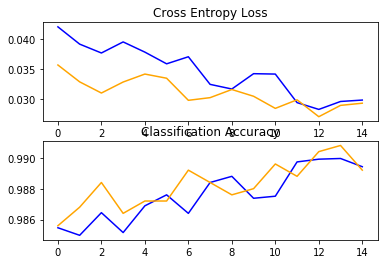

In [0]:
import sys
from matplotlib import pyplot
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['acc'], color='blue', label='train')
pyplot.plot(history.history['val_acc'], color='orange', label='test')
pyplot.show()

In [0]:
df_test.head()

,filename
0,295.jpg
1,2102.jpg
2,1154.jpg
3,9089.jpg
4,3685.jpg


##Pre-processing test data using ImageDatagenerator

In [0]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    df_test, 
    "/content/test1", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(256,256),
    batch_size=100,
    shuffle=False
)

Found 12500 validated image filenames.


## Predicting output of test data 

In [0]:
import numpy as np
predict = model.predict_generator(test_generator, steps=np.ceil(100))

### Rounding up the prediction values

In [0]:
print(predict[0].round())

[0.]
